In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
data_path = '../data/average.txt'

columns = ['symbol', 'ma_price', 'timestamp', 'calculation_delay']
df = pd.read_csv(data_path, sep=' ', names=columns, header=None)

df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

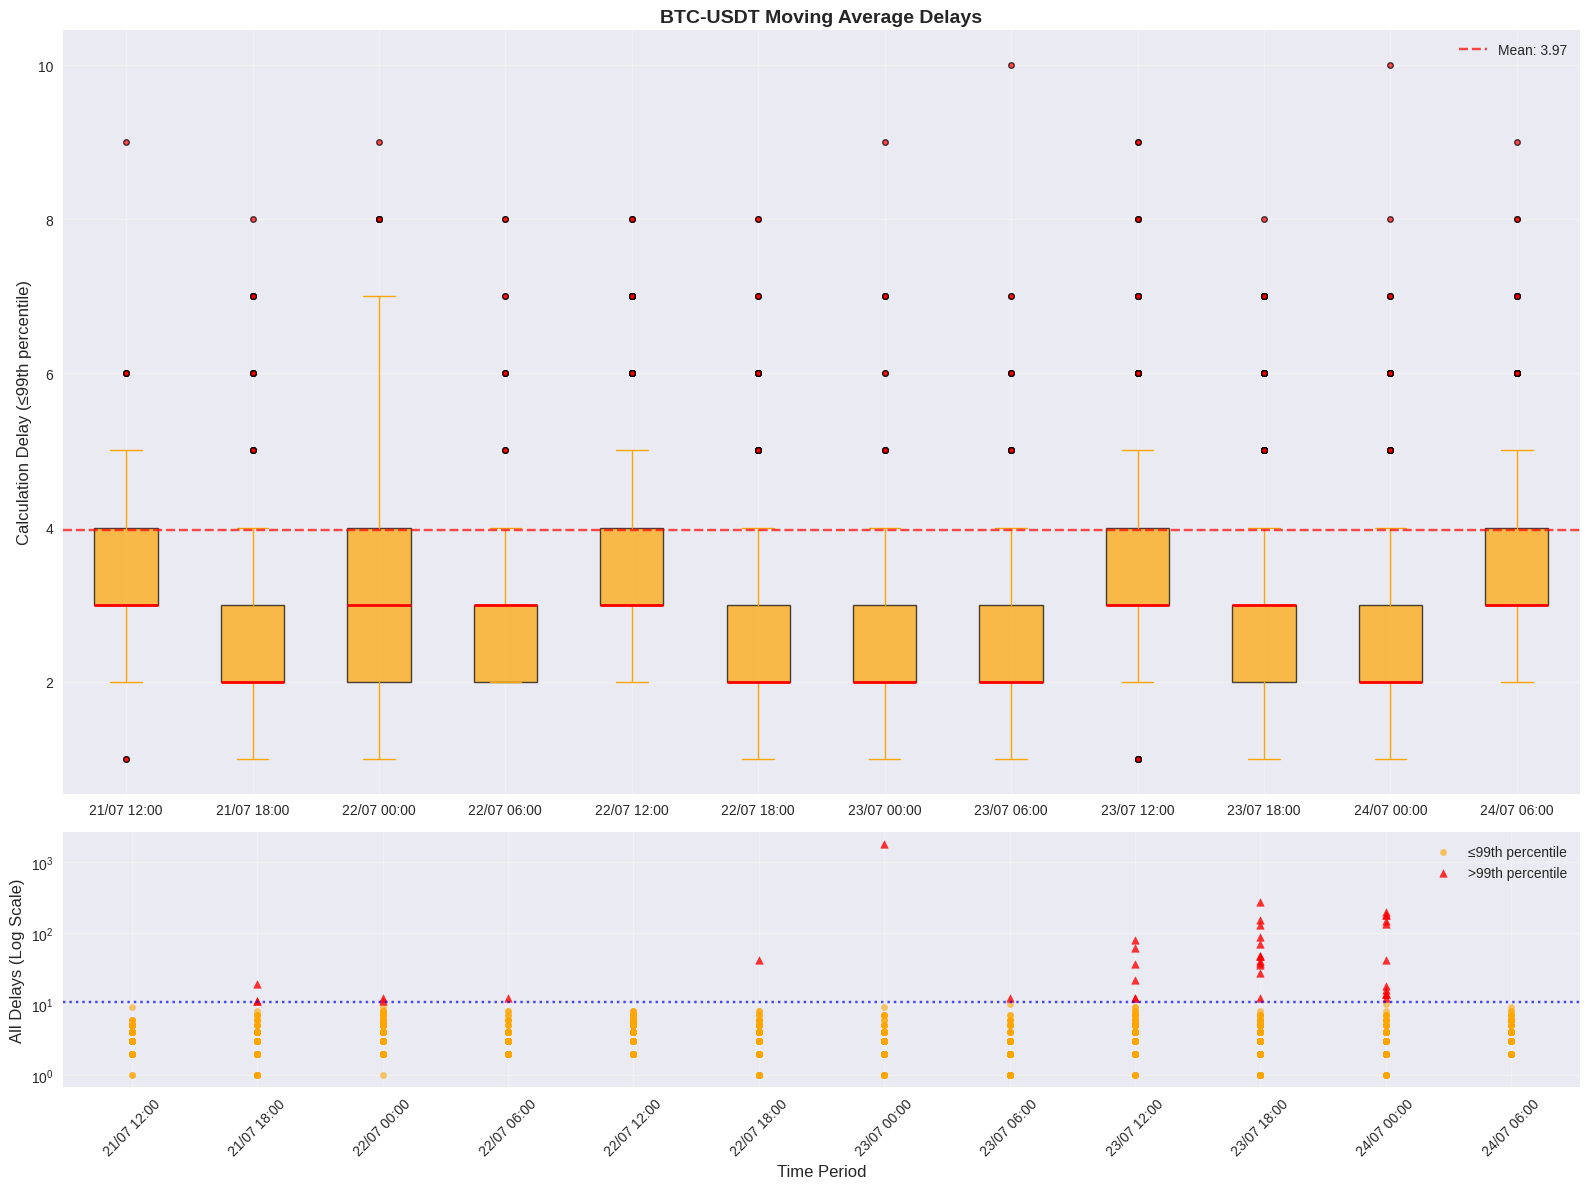

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), height_ratios=[3, 1])

btc_data = df[df['symbol'] == 'BTC-USDT'].sort_values('datetime')

q99 = btc_data['calculation_delay'].quantile(0.99)
btc_normal = btc_data[btc_data['calculation_delay'] <= q99].copy()

btc_normal['hour_bin'] = btc_normal['datetime'].dt.floor('6h')
btc_normal['hour_label'] = btc_normal['hour_bin'].dt.strftime('%d/%m %H:%M')

box_data_normal = [btc_normal[btc_normal['hour_bin'] == bin_time]['calculation_delay'].values 
                   for bin_time in sorted(btc_normal['hour_bin'].unique())]
box_labels_normal = [label for label in sorted(btc_normal['hour_label'].unique())]

bp1 = ax1.boxplot(box_data_normal, tick_labels=box_labels_normal, patch_artist=True,
                  boxprops=dict(facecolor='orange', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='orange'),
                  capprops=dict(color='orange'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.7))

ax1.set_ylabel('Calculation Delay (≤99th percentile)', fontsize=12)
ax1.set_title('BTC-USDT Moving Average Delays', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

all_mean = btc_data['calculation_delay'].mean()
ax1.axhline(y=all_mean, color='red', linestyle='--', alpha=0.7, 
            label=f'Mean: {all_mean:.2f}')
ax1.legend(loc='upper right')

btc_data['hour_bin'] = btc_data['datetime'].dt.floor('6h')
btc_data['hour_label'] = btc_data['hour_bin'].dt.strftime('%d/%m %H:%M')

unique_bins = sorted(btc_data['hour_bin'].unique())
bin_to_x = {bin_time: i+1 for i, bin_time in enumerate(unique_bins)}
btc_data['x_pos'] = btc_data['hour_bin'].map(bin_to_x)

btc_outliers = btc_data[btc_data['calculation_delay'] > q99]
btc_normal_scatter = btc_data[btc_data['calculation_delay'] <= q99]

ax2.scatter(btc_normal_scatter['x_pos'], btc_normal_scatter['calculation_delay'], 
           alpha=0.6, s=20, color='orange', label=f'≤99th percentile')

if len(btc_outliers) > 0:
    ax2.scatter(btc_outliers['x_pos'], btc_outliers['calculation_delay'], 
               alpha=0.8, s=30, color='red', marker='^', 
               label=f'>99th percentile')

ax2.set_xlabel('Time Period', fontsize=12)
ax2.set_ylabel('All Delays (Log Scale)', fontsize=12)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend()

ax2.set_xticks(range(1, len(box_labels_normal) + 1))
ax2.set_xticklabels(box_labels_normal, rotation=45)

ax2.axhline(y=q99, color='blue', linestyle=':', alpha=0.7, 
            label=f'99th percentile: {q99:.0f}')

plt.tight_layout()
plt.show()

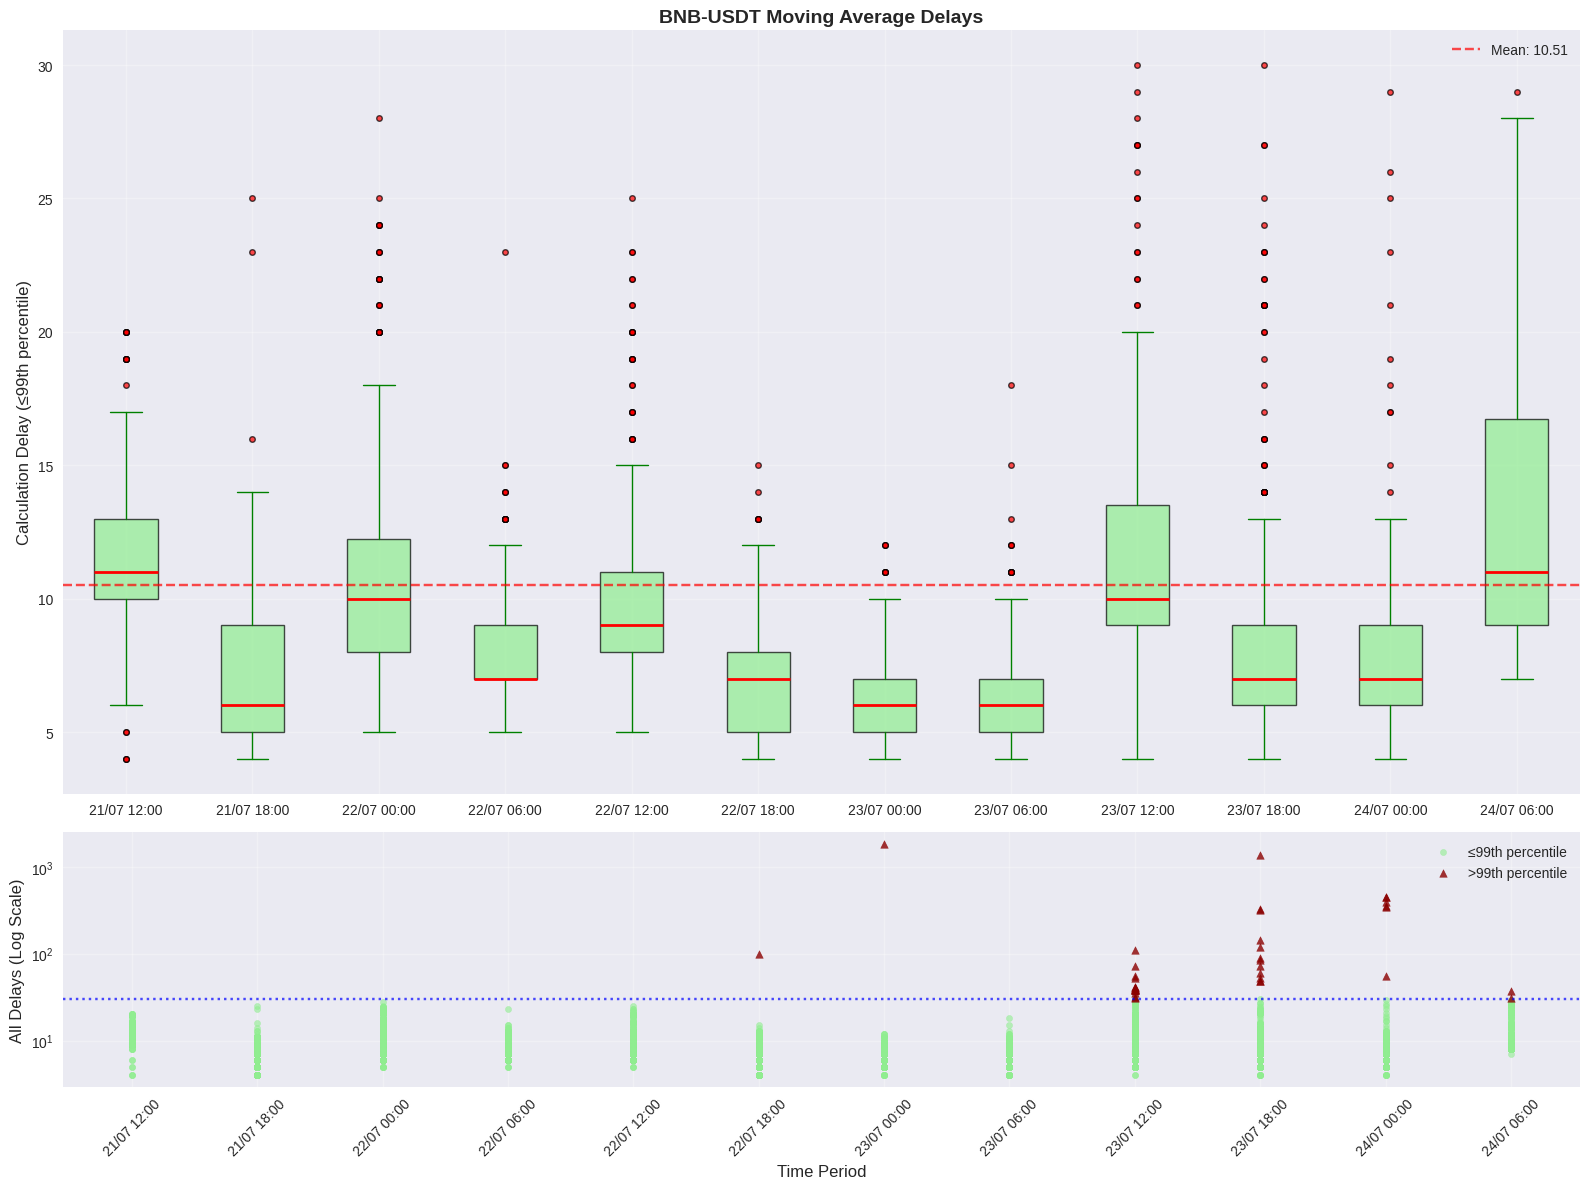

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), height_ratios=[3, 1])

bnb_data = df[df['symbol'] == 'BNB-USDT'].sort_values('datetime')

q99_bnb = bnb_data['calculation_delay'].quantile(0.99)
bnb_filtered = bnb_data[bnb_data['calculation_delay'] <= q99_bnb].copy()

bnb_filtered['hour_bin'] = bnb_filtered['datetime'].dt.floor('6h')
bnb_filtered['hour_label'] = bnb_filtered['hour_bin'].dt.strftime('%d/%m %H:%M')

box_data_filtered = [bnb_filtered[bnb_filtered['hour_bin'] == bin_time]['calculation_delay'].values 
                     for bin_time in sorted(bnb_filtered['hour_bin'].unique())]
box_labels_filtered = [label for label in sorted(bnb_filtered['hour_label'].unique())]

bp1 = ax1.boxplot(box_data_filtered, tick_labels=box_labels_filtered, patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='green'),
                  capprops=dict(color='green'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.7))

ax1.set_ylabel('Calculation Delay (≤99th percentile)', fontsize=12)
ax1.set_title('BNB-USDT Moving Average Delays', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

all_mean_bnb = bnb_data['calculation_delay'].mean()
ax1.axhline(y=all_mean_bnb, color='red', linestyle='--', alpha=0.7, 
            label=f'Mean: {all_mean_bnb:.2f}')
ax1.legend(loc='upper right')

bnb_data['hour_bin'] = bnb_data['datetime'].dt.floor('6h')
bnb_data['hour_label'] = bnb_data['hour_bin'].dt.strftime('%d/%m %H:%M')

unique_bins_bnb = sorted(bnb_data['hour_bin'].unique())
bin_to_x_bnb = {bin_time: i+1 for i, bin_time in enumerate(unique_bins_bnb)}
bnb_data['x_pos'] = bnb_data['hour_bin'].map(bin_to_x_bnb)

bnb_outliers = bnb_data[bnb_data['calculation_delay'] > q99_bnb]
bnb_filtered_scatter = bnb_data[bnb_data['calculation_delay'] <= q99_bnb]

ax2.scatter(bnb_filtered_scatter['x_pos'], bnb_filtered_scatter['calculation_delay'], 
           alpha=0.6, s=20, color='lightgreen', label=f'≤99th percentile')

if len(bnb_outliers) > 0:
    ax2.scatter(bnb_outliers['x_pos'], bnb_outliers['calculation_delay'], 
               alpha=0.8, s=30, color='darkred', marker='^', 
               label=f'>99th percentile')

ax2.set_xlabel('Time Period', fontsize=12)
ax2.set_ylabel('All Delays (Log Scale)', fontsize=12)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend()

ax2.set_xticks(range(1, len(box_labels_filtered) + 1))
ax2.set_xticklabels(box_labels_filtered, rotation=45)

ax2.axhline(y=q99_bnb, color='blue', linestyle=':', alpha=0.7, 
            label=f'99th percentile: {q99_bnb:.0f}')

plt.tight_layout()
plt.show()

In [5]:
pearson_path = '../data/pearson.txt'

pearson_columns = ['symbol1', 'symbol2', 'correlation', 'timestamp1', 'timestamp2', 'calculation_delay']
pearson_df = pd.read_csv(pearson_path, sep=' ', names=pearson_columns, header=None)

pearson_df['datetime'] = pd.to_datetime(pearson_df['timestamp2'], unit='ms')

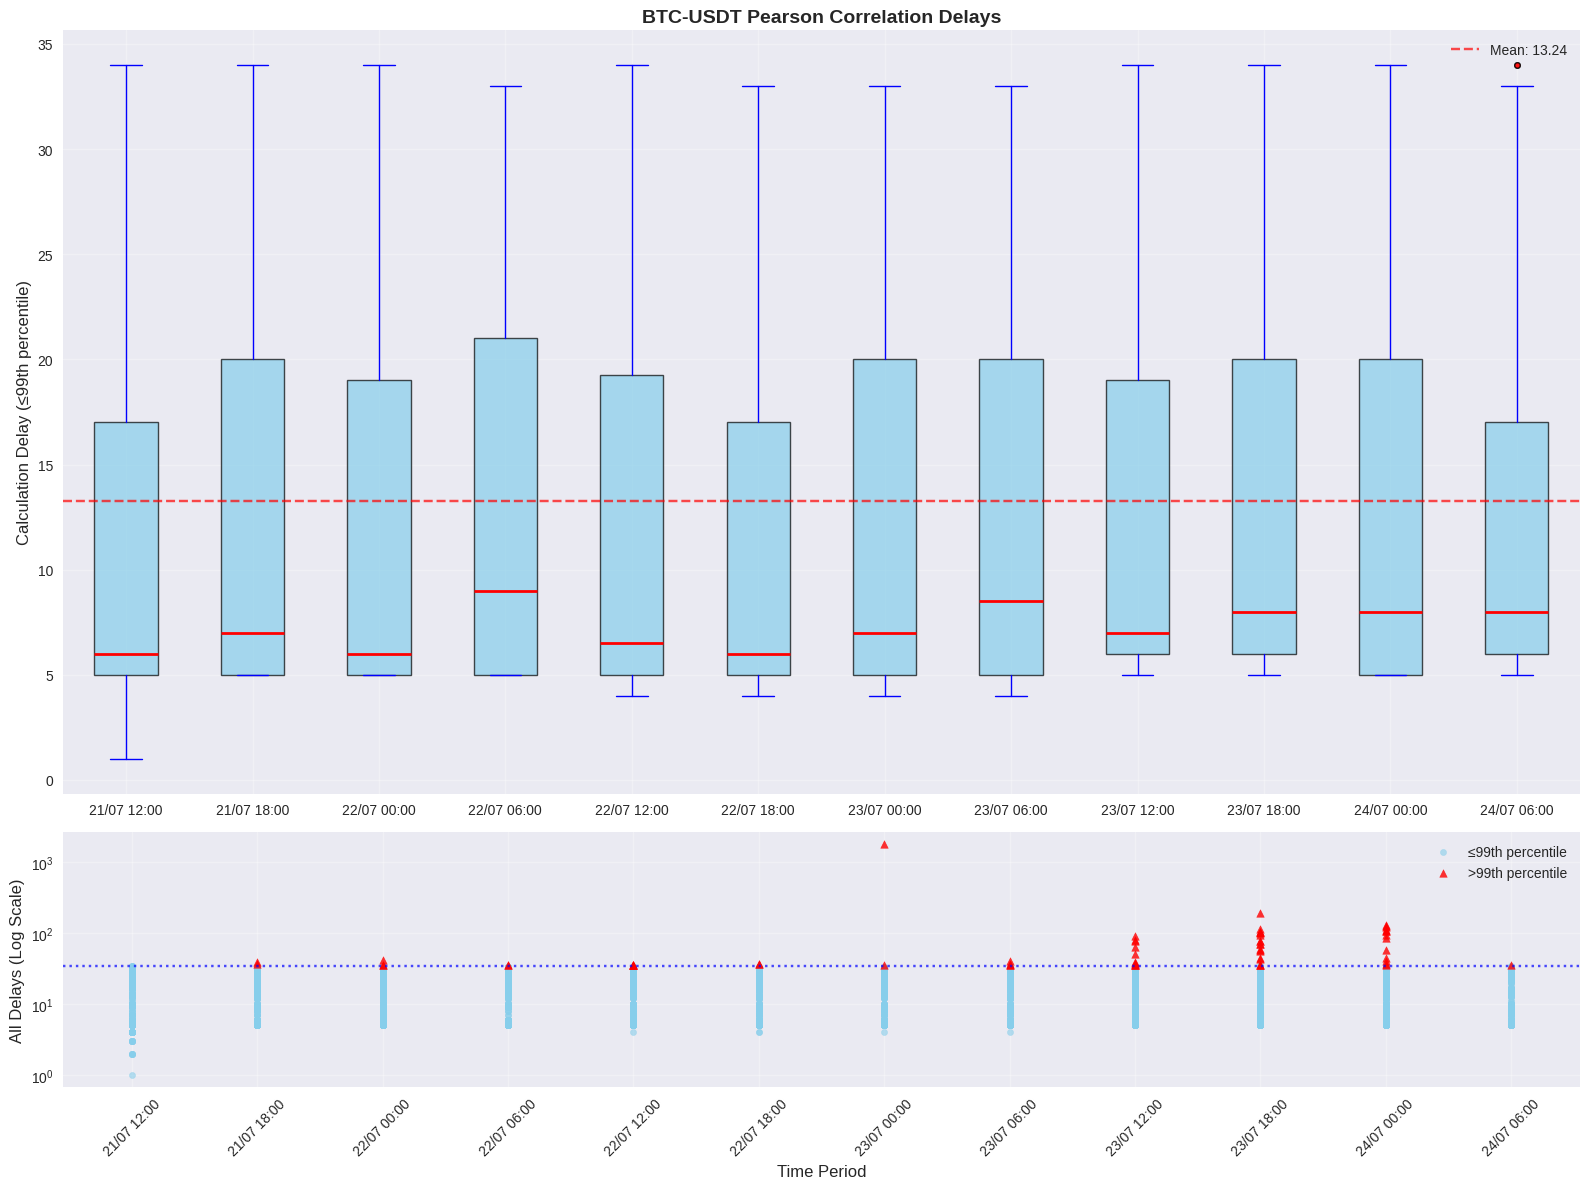

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), height_ratios=[3, 1])

btc_pearson_data = pearson_df[
    (pearson_df['symbol1'] == 'BTC-USDT') | (pearson_df['symbol2'] == 'BTC-USDT')
].sort_values('datetime')

q99_btc_pearson = btc_pearson_data['calculation_delay'].quantile(0.99)
btc_pearson_filtered = btc_pearson_data[btc_pearson_data['calculation_delay'] <= q99_btc_pearson].copy()

btc_pearson_filtered['hour_bin'] = btc_pearson_filtered['datetime'].dt.floor('6h')
btc_pearson_filtered['hour_label'] = btc_pearson_filtered['hour_bin'].dt.strftime('%d/%m %H:%M')

box_data_pearson = [btc_pearson_filtered[btc_pearson_filtered['hour_bin'] == bin_time]['calculation_delay'].values 
                    for bin_time in sorted(btc_pearson_filtered['hour_bin'].unique())]
box_labels_pearson = [label for label in sorted(btc_pearson_filtered['hour_label'].unique())]

bp1 = ax1.boxplot(box_data_pearson, tick_labels=box_labels_pearson, patch_artist=True,
                  boxprops=dict(facecolor='skyblue', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='blue'),
                  capprops=dict(color='blue'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.7))

ax1.set_ylabel('Calculation Delay (≤99th percentile)', fontsize=12)
ax1.set_title('BTC-USDT Pearson Correlation Delays', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

all_mean_btc_pearson = btc_pearson_data['calculation_delay'].mean()
ax1.axhline(y=all_mean_btc_pearson, color='red', linestyle='--', alpha=0.7, 
            label=f'Mean: {all_mean_btc_pearson:.2f}')
ax1.legend(loc='upper right')

btc_pearson_data['hour_bin'] = btc_pearson_data['datetime'].dt.floor('6h')
btc_pearson_data['hour_label'] = btc_pearson_data['hour_bin'].dt.strftime('%d/%m %H:%M')

unique_bins_btc_pearson = sorted(btc_pearson_data['hour_bin'].unique())
bin_to_x_btc_pearson = {bin_time: i+1 for i, bin_time in enumerate(unique_bins_btc_pearson)}
btc_pearson_data['x_pos'] = btc_pearson_data['hour_bin'].map(bin_to_x_btc_pearson)

btc_pearson_outliers = btc_pearson_data[btc_pearson_data['calculation_delay'] > q99_btc_pearson]
btc_pearson_filtered_scatter = btc_pearson_data[btc_pearson_data['calculation_delay'] <= q99_btc_pearson]

ax2.scatter(btc_pearson_filtered_scatter['x_pos'], btc_pearson_filtered_scatter['calculation_delay'], 
           alpha=0.6, s=20, color='skyblue', label=f'≤99th percentile')

if len(btc_pearson_outliers) > 0:
    ax2.scatter(btc_pearson_outliers['x_pos'], btc_pearson_outliers['calculation_delay'], 
               alpha=0.8, s=30, color='red', marker='^', 
               label=f'>99th percentile')

ax2.set_xlabel('Time Period', fontsize=12)
ax2.set_ylabel('All Delays (Log Scale)', fontsize=12)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend()

ax2.set_xticks(range(1, len(box_labels_pearson) + 1))
ax2.set_xticklabels(box_labels_pearson, rotation=45)

ax2.axhline(y=q99_btc_pearson, color='blue', linestyle=':', alpha=0.7, 
            label=f'99th percentile: {q99_btc_pearson:.0f}')

plt.tight_layout()
plt.show()

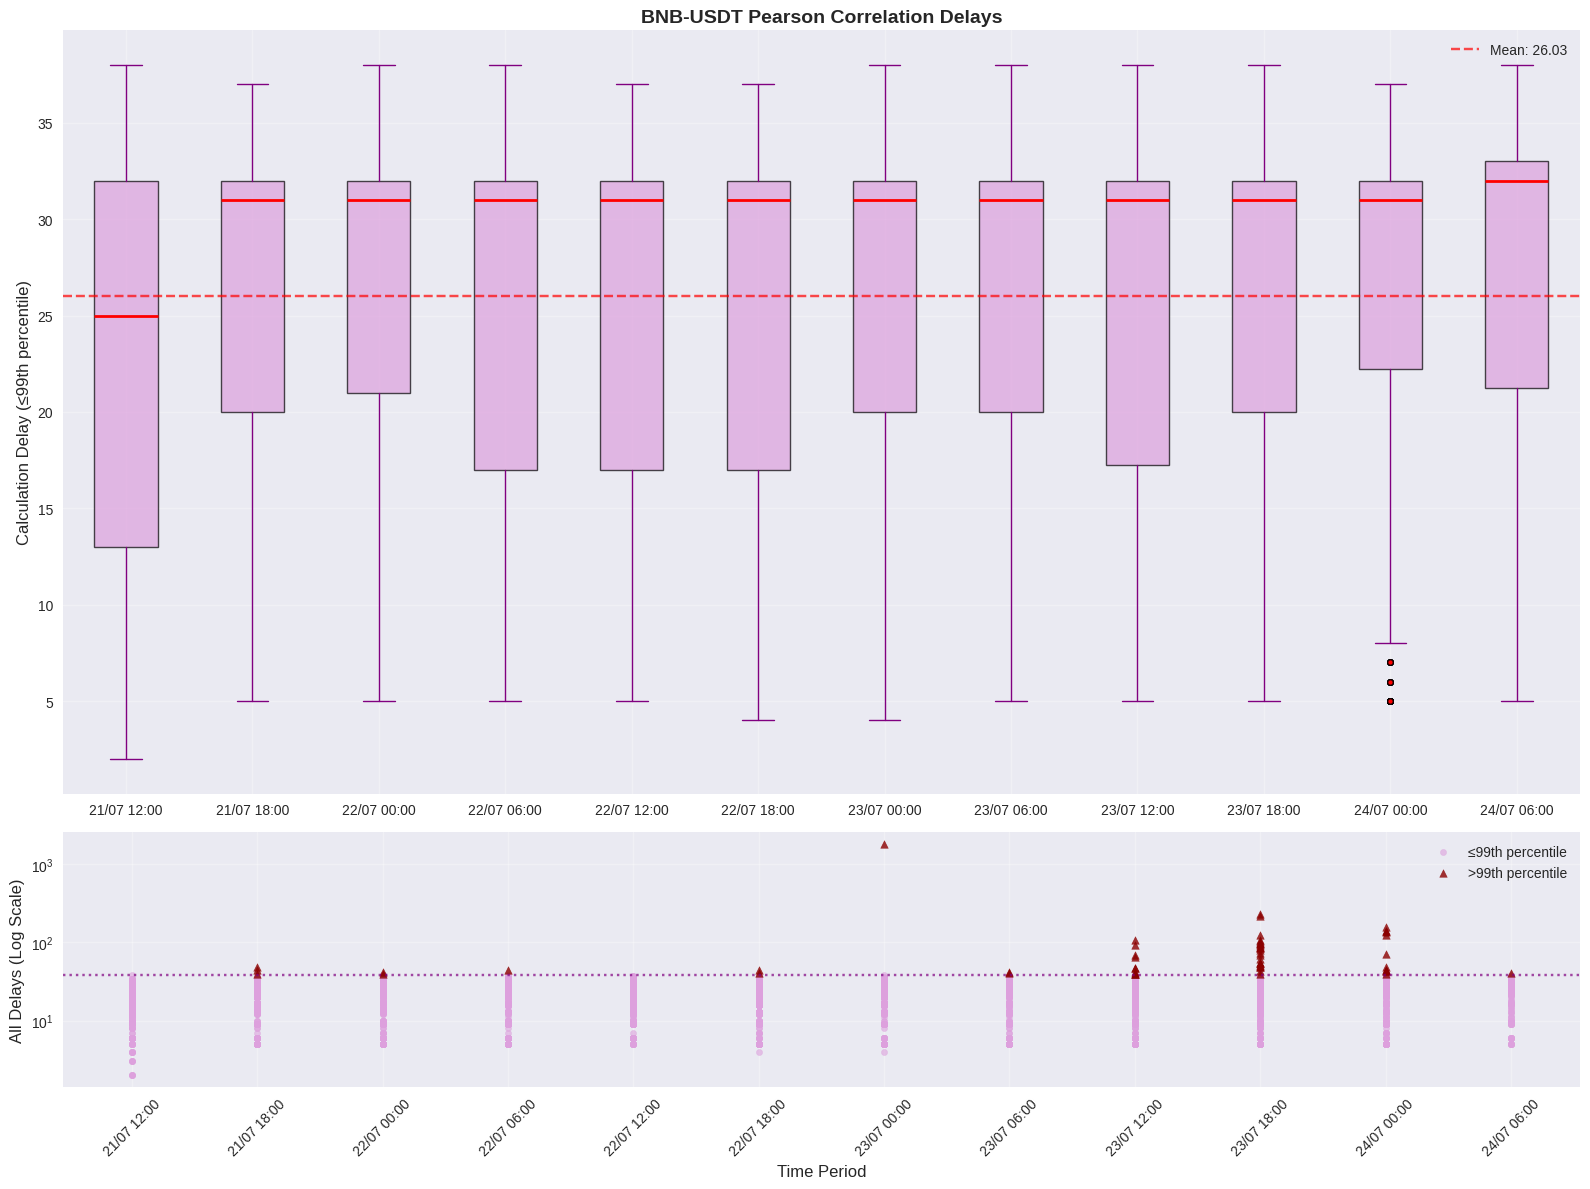

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), height_ratios=[3, 1])

bnb_pearson_data = pearson_df[
    (pearson_df['symbol1'] == 'BNB-USDT') | (pearson_df['symbol2'] == 'BNB-USDT')
].sort_values('datetime')

q99_bnb_pearson = bnb_pearson_data['calculation_delay'].quantile(0.99)
bnb_pearson_filtered = bnb_pearson_data[bnb_pearson_data['calculation_delay'] <= q99_bnb_pearson].copy()

bnb_pearson_filtered['hour_bin'] = bnb_pearson_filtered['datetime'].dt.floor('6h')
bnb_pearson_filtered['hour_label'] = bnb_pearson_filtered['hour_bin'].dt.strftime('%d/%m %H:%M')

box_data_bnb_pearson = [bnb_pearson_filtered[bnb_pearson_filtered['hour_bin'] == bin_time]['calculation_delay'].values 
                        for bin_time in sorted(bnb_pearson_filtered['hour_bin'].unique())]
box_labels_bnb_pearson = [label for label in sorted(bnb_pearson_filtered['hour_label'].unique())]

bp1 = ax1.boxplot(box_data_bnb_pearson, tick_labels=box_labels_bnb_pearson, patch_artist=True,
                  boxprops=dict(facecolor='plum', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='purple'),
                  capprops=dict(color='purple'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.7))

ax1.set_ylabel('Calculation Delay (≤99th percentile)', fontsize=12)
ax1.set_title('BNB-USDT Pearson Correlation Delays', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

all_mean_bnb_pearson = bnb_pearson_data['calculation_delay'].mean()
ax1.axhline(y=all_mean_bnb_pearson, color='red', linestyle='--', alpha=0.7, 
            label=f'Mean: {all_mean_bnb_pearson:.2f}')
ax1.legend(loc='upper right')

bnb_pearson_data['hour_bin'] = bnb_pearson_data['datetime'].dt.floor('6h')
bnb_pearson_data['hour_label'] = bnb_pearson_data['hour_bin'].dt.strftime('%d/%m %H:%M')

unique_bins_bnb_pearson = sorted(bnb_pearson_data['hour_bin'].unique())
bin_to_x_bnb_pearson = {bin_time: i+1 for i, bin_time in enumerate(unique_bins_bnb_pearson)}
bnb_pearson_data['x_pos'] = bnb_pearson_data['hour_bin'].map(bin_to_x_bnb_pearson)

bnb_pearson_outliers = bnb_pearson_data[bnb_pearson_data['calculation_delay'] > q99_bnb_pearson]
bnb_pearson_filtered_scatter = bnb_pearson_data[bnb_pearson_data['calculation_delay'] <= q99_bnb_pearson]

ax2.scatter(bnb_pearson_filtered_scatter['x_pos'], bnb_pearson_filtered_scatter['calculation_delay'], 
           alpha=0.6, s=20, color='plum', label=f'≤99th percentile')

if len(bnb_pearson_outliers) > 0:
    ax2.scatter(bnb_pearson_outliers['x_pos'], bnb_pearson_outliers['calculation_delay'], 
               alpha=0.8, s=30, color='darkred', marker='^', 
               label=f'>99th percentile')

ax2.set_xlabel('Time Period', fontsize=12)
ax2.set_ylabel('All Delays (Log Scale)', fontsize=12)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)
ax2.legend()

ax2.set_xticks(range(1, len(box_labels_bnb_pearson) + 1))
ax2.set_xticklabels(box_labels_bnb_pearson, rotation=45)

ax2.axhline(y=q99_bnb_pearson, color='purple', linestyle=':', alpha=0.7, 
            label=f'99th percentile: {q99_bnb_pearson:.0f}')

plt.tight_layout()
plt.show()

In [8]:
cpu_path = '../data/cpu_stats.txt'

cpu_columns = ['timestamp', 'cpu_idle_percentage']
cpu_df = pd.read_csv(cpu_path, sep=' ', names=cpu_columns, header=None)

cpu_df['datetime'] = pd.to_datetime(cpu_df['timestamp'], unit='ms')

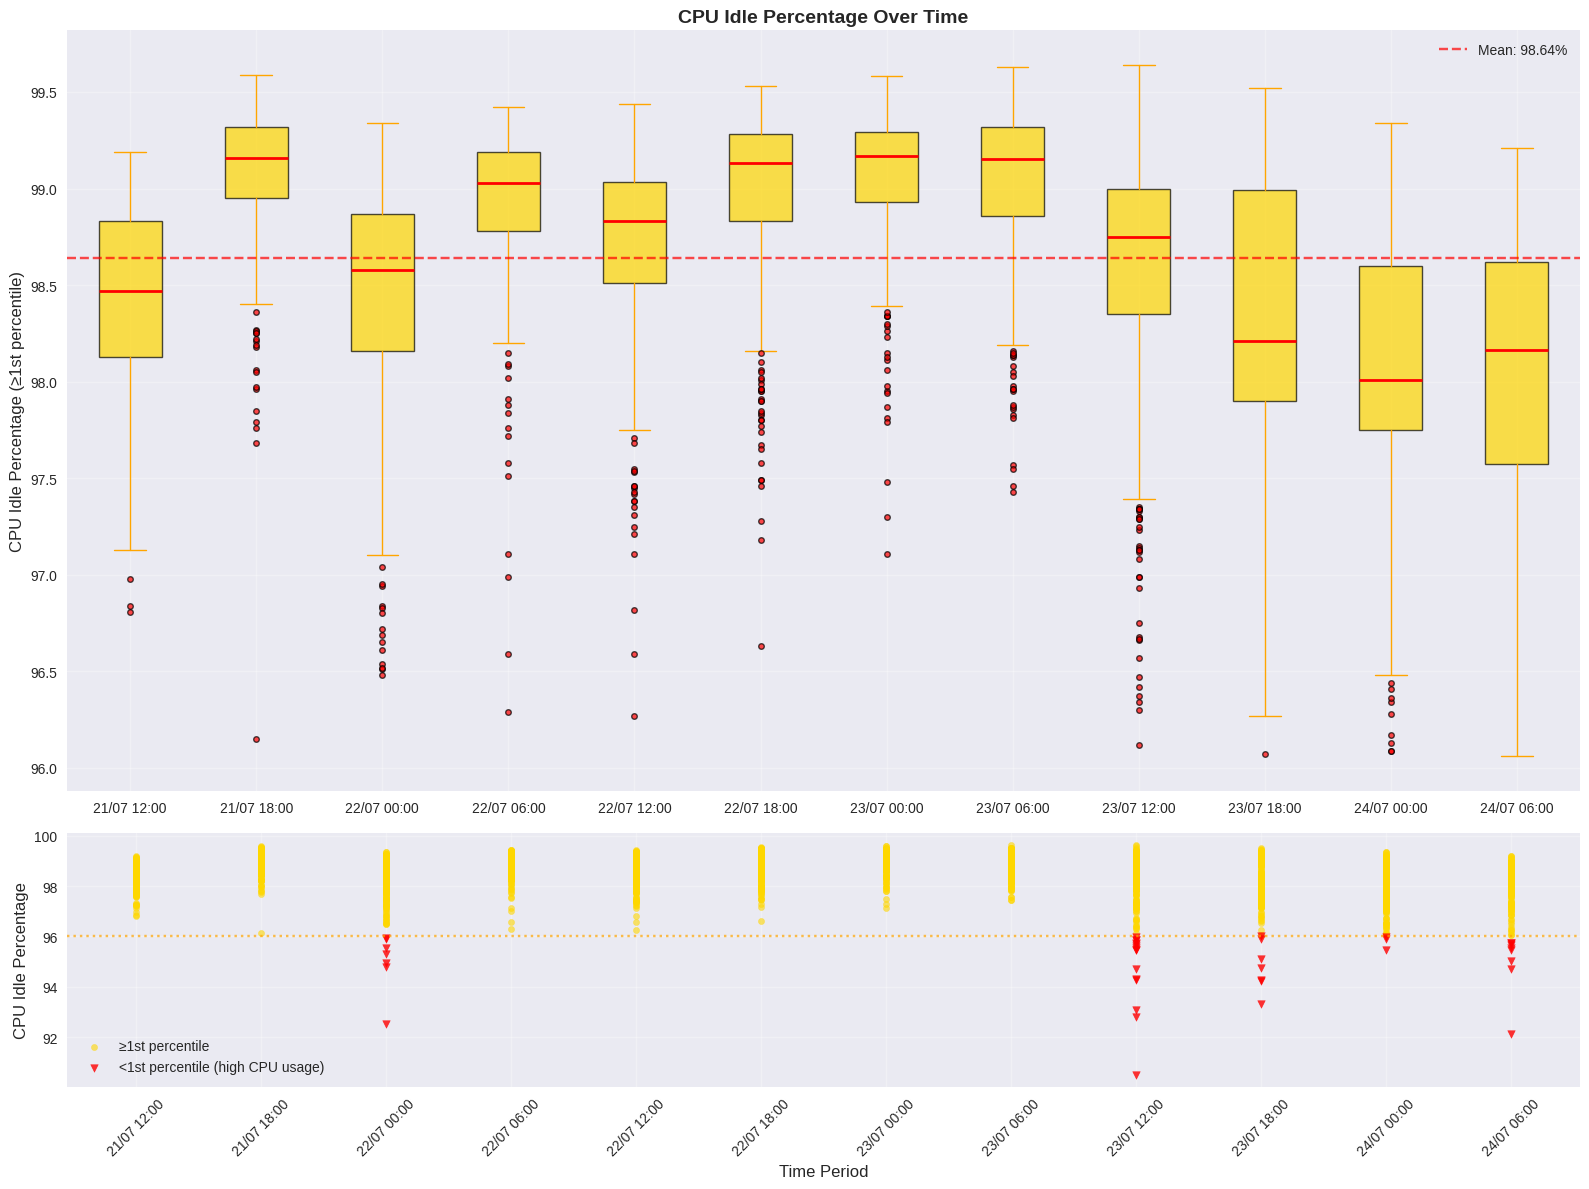

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), height_ratios=[3, 1])

cpu_data = cpu_df.sort_values('datetime')

q01_cpu = cpu_data['cpu_idle_percentage'].quantile(0.01)
cpu_filtered = cpu_data[cpu_data['cpu_idle_percentage'] >= q01_cpu].copy()

cpu_filtered['hour_bin'] = cpu_filtered['datetime'].dt.floor('6h')
cpu_filtered['hour_label'] = cpu_filtered['hour_bin'].dt.strftime('%d/%m %H:%M')

box_data_cpu = [cpu_filtered[cpu_filtered['hour_bin'] == bin_time]['cpu_idle_percentage'].values 
                for bin_time in sorted(cpu_filtered['hour_bin'].unique())]
box_labels_cpu = [label for label in sorted(cpu_filtered['hour_label'].unique())]

bp1 = ax1.boxplot(box_data_cpu, tick_labels=box_labels_cpu, patch_artist=True,
                  boxprops=dict(facecolor='gold', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='orange'),
                  capprops=dict(color='orange'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.7))

ax1.set_ylabel('CPU Idle Percentage (≥1st percentile)', fontsize=12)
ax1.set_title('CPU Idle Percentage Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

all_mean_cpu = cpu_data['cpu_idle_percentage'].mean()
ax1.axhline(y=all_mean_cpu, color='red', linestyle='--', alpha=0.7, 
            label=f'Mean: {all_mean_cpu:.2f}%')
ax1.legend(loc='upper right')

cpu_data['hour_bin'] = cpu_data['datetime'].dt.floor('6h')
cpu_data['hour_label'] = cpu_data['hour_bin'].dt.strftime('%d/%m %H:%M')

unique_bins_cpu = sorted(cpu_data['hour_bin'].unique())
bin_to_x_cpu = {bin_time: i+1 for i, bin_time in enumerate(unique_bins_cpu)}
cpu_data['x_pos'] = cpu_data['hour_bin'].map(bin_to_x_cpu)

cpu_outliers = cpu_data[cpu_data['cpu_idle_percentage'] < q01_cpu]
cpu_filtered_scatter = cpu_data[cpu_data['cpu_idle_percentage'] >= q01_cpu]

ax2.scatter(cpu_filtered_scatter['x_pos'], cpu_filtered_scatter['cpu_idle_percentage'], 
           alpha=0.6, s=20, color='gold', label=f'≥1st percentile')

if len(cpu_outliers) > 0:
    ax2.scatter(cpu_outliers['x_pos'], cpu_outliers['cpu_idle_percentage'], 
               alpha=0.8, s=30, color='red', marker='v', 
               label=f'<1st percentile (high CPU usage)')

ax2.set_xlabel('Time Period', fontsize=12)
ax2.set_ylabel('CPU Idle Percentage', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

ax2.set_xticks(range(1, len(box_labels_cpu) + 1))
ax2.set_xticklabels(box_labels_cpu, rotation=45)

ax2.axhline(y=q01_cpu, color='orange', linestyle=':', alpha=0.7, 
            label=f'1st percentile: {q01_cpu:.2f}%')

plt.tight_layout()
plt.show()